## Name: Sindhu Madhadi      
### A1: Data Curation
   ### Steps: Data acquisition,Data processing,Data Analysis



# 1.Data Acquistion:
#### We havae two data Soures from Wikipedia: 
   #####    - Pagecounts 
   #####    - Pageviews
  #####  we need to collect data from from 2008-2021 and store in 5 diffrent json file


In [1]:
import json
import requests
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'


## Sample parameters for getting aggregated legacy view data from December 2007 through July 2016.
### see: https://wikimedia.org/api/rest_v1/#/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end

In [3]:
example_params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                 "end" : "2016070100"
                    }
example_params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                 "end" : "2016070100"
                    }





## Sample parameters for getting aggregated current standard pageview data from July 2015 through last month.
### see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end

In [4]:
example_params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2021090100'
                        }
example_params_pageviews_mobileweb = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2021090100'
                        }
example_params_pageviews_mobileapp = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2021090100'
                        }


## Defining Headers 

In [5]:
headers = {'User-Agent': 'https://github.com/sindhumadhadi09', 'From': 'sindhu09@uw.edu'}

## Defining a Function to get data from API :

In [6]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response
    

## Writing Json to file for all the 5 API types:

### 1. Pagecounts Endpints Desktop-stie API:

In [7]:

monthly_legacy_desktopviews=api_call(endpoint_legacy,example_params_legacy_desktop)
with open("/Users/dinsind/Desktop/raw_data/pagecounts_desktop-site_200712-201607.json",'w') as outfile:
    json.dump(monthly_legacy_desktopviews,outfile)


### 2. PageCounts Endpoints mobile-stie API:

In [8]:
monthly_legacy_mobilepviews=api_call(endpoint_legacy,example_params_legacy_mobile)
with open("/Users/dinsind/Desktop/raw_data/pagecounts_mobile-site_200712-201607.json",'w') as outfile:
    json.dump(monthly_legacy_mobilepviews,outfile)


### 3. PageViews Endpoints Desktop API:

In [9]:
monthly_page_desktopviews=api_call(endpoint_pageviews,example_params_pageviews_desktop)
with open("/Users/dinsind/Desktop/raw_data/pageviews_desktop_2001507-202109.json",'w') as outfile:
    json.dump(monthly_page_desktopviews,outfile)

### 4. PageViews Endpoints mobile-site API:

In [10]:
monthly_page_mobilewebviews=api_call(endpoint_pageviews,example_params_pageviews_mobileweb)
with open("/Users/dinsind/Desktop/raw_data/pageviews_mobile-web_2001507-202109.json",'w') as outfile:
    json.dump(monthly_page_mobilewebviews,outfile)

### 5. PageViews Endpoints mobile-app API:

In [11]:
monthly_page_mobileappviews=api_call(endpoint_pageviews,example_params_pageviews_mobileapp)
with open("/Users/dinsind/Desktop/raw_data/pageviews_mobile-app_2001507-202109.json",'w') as outfile:
    json.dump(monthly_page_mobileappviews,outfile)

# 2.Data Processing:
### For data collected from the Pageviews API, combine the monthly values for mobile-app and mobile-web to create a total mobile traffic count for each month.
 #### To achive above steps first laoding the json data from file to a pandas dataframe
 
### For all data, separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM) and discard values for day and hour (DDHH).




In [12]:
def convert_to_dataframe(json_file):
    with open(json_file) as data_file:    
        data = json.load(data_file)
        df = pd.DataFrame(data['items'])
        return df
df_pageviews_mobileweb = convert_to_dataframe('/Users/dinsind/Desktop/raw_data/pageviews_mobile-web_2001507-202109.json')
df_pageviews_mobileapp = convert_to_dataframe('/Users/dinsind/Desktop/raw_data/pageviews_mobile-app_2001507-202109.json')
df_pageviews_desktop = convert_to_dataframe('/Users/dinsind/Desktop/raw_data/pageviews_desktop_2001507-202109.json')

#concat the data frames:
df_pageviews=pd.concat([df_pageviews_mobileweb,df_pageviews_mobileapp,df_pageviews_desktop])

# keep only neccesray colums:
df_pageviews[["access","timestamp","views"]]

# pivot the index:
df_pageviews=df_pageviews.pivot(index="timestamp",columns="access",values="views").reset_index()

#cobining monthy values:
df_pageviews['pageview_mobile_views']=df_pageviews['mobile-app']+df_pageviews['mobile-web']
df_pageviews['pageview_all_views']=df_pageviews['mobile-app']+df_pageviews['mobile-web']+df_pageviews['desktop']
df_pageviews['pageview_desktop_views']=df_pageviews['desktop']
df_pageviews

access,timestamp,desktop,mobile-app,mobile-web,pageview_mobile_views,pageview_all_views,pageview_desktop_views
0,2015070100,4376666686,109624146,3179131148,3288755294,7665421980,4376666686
1,2015080100,4332482183,109669149,3192663889,3302333038,7634815221,4332482183
2,2015090100,4485491704,96221684,3073981649,3170203333,7655695037,4485491704
3,2015100100,4477532755,94523777,3173975355,3268499132,7746031887,4477532755
4,2015110100,4287720220,94353925,3142247145,3236601070,7524321290,4287720220
...,...,...,...,...,...,...,...
69,2021040100,2882714492,162260497,4596834586,4759095083,7641809575,2882714492
70,2021050100,2824416177,166485079,4810094479,4976579558,7800995735,2824416177
71,2021060100,2505971366,150704624,4433805793,4584510417,7090481783,2505971366
72,2021070100,2765584368,161461155,4617448266,4778909421,7544493789,2765584368


In [13]:
#Similarly convert the rest for pagcoun and others:
df_pagecount_desktop = convert_to_dataframe('/Users/dinsind/Desktop/raw_data/pagecounts_desktop-site_200712-201607.json')
df_pagecount_mobile  = convert_to_dataframe('/Users/dinsind/Desktop/raw_data/pagecounts_mobile-site_200712-201607.json')


#concat the data frames:
df_pagecount=pd.concat([df_pagecount_desktop,df_pagecount_mobile])
df_pagecount

# keep only neccesray colums:
df_pagecount[["access-site","timestamp","count"]]

# pivot the index:
df_pagecount=df_pagecount.pivot(index="timestamp",columns="access-site",values="count").reset_index()
df_pagecount = df_pagecount.fillna(0)

df_pagecount['pagecount_desktop_views']=df_pagecount['desktop-site']
df_pagecount['pagecount_mobile_views']=df_pagecount['mobile-site']
df_pagecount['pagecount_all_views']=df_pagecount['mobile-site']+df_pagecount['desktop-site']

df_pagecount

access-site,timestamp,desktop-site,mobile-site,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views
0,2007120100,2.998332e+09,0.000000e+00,2.998332e+09,0.000000e+00,2.998332e+09
1,2008010100,4.930903e+09,0.000000e+00,4.930903e+09,0.000000e+00,4.930903e+09
2,2008020100,4.818394e+09,0.000000e+00,4.818394e+09,0.000000e+00,4.818394e+09
3,2008030100,4.955406e+09,0.000000e+00,4.955406e+09,0.000000e+00,4.955406e+09
4,2008040100,5.159162e+09,0.000000e+00,5.159162e+09,0.000000e+00,5.159162e+09
...,...,...,...,...,...,...
98,2016020100,5.347709e+09,3.333231e+09,5.347709e+09,3.333231e+09,8.680941e+09
99,2016030100,5.407676e+09,3.419854e+09,5.407676e+09,3.419854e+09,8.827530e+09
100,2016040100,5.572235e+09,3.301385e+09,5.572235e+09,3.301385e+09,8.873621e+09
101,2016050100,5.330532e+09,3.418436e+09,5.330532e+09,3.418436e+09,8.748968e+09


In [14]:
# combine the two data frames:
df_output = pd.merge(df_pagecount,df_pageviews,
                     how='outer',
                     on='timestamp')
df_output = df_output.fillna(0)


## For all data, separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM) and discard values for day and hour (DDHH).

In [15]:
df_output['Year'] = df_output['timestamp'].str[0:4]
df_output['Month'] = df_output['timestamp'].str[4:6]
df_output.drop('timestamp',axis=1, inplace=True)
df_output

,desktop-site,mobile-site,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views,desktop,mobile-app,mobile-web,pageview_mobile_views,pageview_all_views,pageview_desktop_views,Year,Month
0,2.998332e+09,0.0,2.998332e+09,0.0,2.998332e+09,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007,12
1,4.930903e+09,0.0,4.930903e+09,0.0,4.930903e+09,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2008,01
2,4.818394e+09,0.0,4.818394e+09,0.0,4.818394e+09,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2008,02
3,4.955406e+09,0.0,4.955406e+09,0.0,4.955406e+09,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2008,03
4,5.159162e+09,0.0,5.159162e+09,0.0,5.159162e+09,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2008,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,2.882714e+09,162260497.0,4.596835e+09,4.759095e+09,7.641810e+09,2.882714e+09,2021,04
161,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,2.824416e+09,166485079.0,4.810094e+09,4.976580e+09,7.800996e+09,2.824416e+09,2021,05
162,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,2.505971e+09,150704624.0,4.433806e+09,4.584510e+09,7.090482e+09,2.505971e+09,2021,06
163,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,2.765584e+09,161461155.0,4.617448e+09,4.778909e+09,7.544494e+09,2.765584e+09,2021,07


In [16]:
df_output = df_output[["Year",
      "Month",
      "pagecount_all_views",
      "pagecount_desktop_views",
      "pagecount_mobile_views",
      "pageview_all_views",
      "pageview_desktop_views",
      "pageview_mobile_views"
     ]]
df_output

,Year,Month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2007,12,2.998332e+09,2.998332e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00
1,2008,01,4.930903e+09,4.930903e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00
2,2008,02,4.818394e+09,4.818394e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00
3,2008,03,4.955406e+09,4.955406e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00
4,2008,04,5.159162e+09,5.159162e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
160,2021,04,0.000000e+00,0.000000e+00,0.0,7.641810e+09,2.882714e+09,4.759095e+09
161,2021,05,0.000000e+00,0.000000e+00,0.0,7.800996e+09,2.824416e+09,4.976580e+09
162,2021,06,0.000000e+00,0.000000e+00,0.0,7.090482e+09,2.505971e+09,4.584510e+09
163,2021,07,0.000000e+00,0.000000e+00,0.0,7.544494e+09,2.765584e+09,4.778909e+09


## The data file should be written to csv:


In [17]:
df_output.to_csv("/Users/dinsind/Desktop/Final_clean_data/en-wikipedia_traffic_200712-202108.csv")

# 3. Data Analysis:
 #### Your visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop).In order to complete the analysis correctly and receive full credit, your graph will need to be the right scale to view the data; all units, axes, and values should be clearly labeled.

In [18]:

df_output["date"] = pd.to_datetime(df_output["Year"].astype('str') + df_output["Month"].astype('str'),format='%Y%m')
df_output

<ipython-input-18-a64bdedd3062>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output["date"] = pd.to_datetime(df_output["Year"].astype('str') + df_output["Month"].astype('str'),format='%Y%m')


,Year,Month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views,date
0,2007,12,2.998332e+09,2.998332e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-01
1,2008,01,4.930903e+09,4.930903e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2008-01-01
2,2008,02,4.818394e+09,4.818394e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2008-02-01
3,2008,03,4.955406e+09,4.955406e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2008-03-01
4,2008,04,5.159162e+09,5.159162e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2008-04-01
...,...,...,...,...,...,...,...,...,...
160,2021,04,0.000000e+00,0.000000e+00,0.0,7.641810e+09,2.882714e+09,4.759095e+09,2021-04-01
161,2021,05,0.000000e+00,0.000000e+00,0.0,7.800996e+09,2.824416e+09,4.976580e+09,2021-05-01
162,2021,06,0.000000e+00,0.000000e+00,0.0,7.090482e+09,2.505971e+09,4.584510e+09,2021-06-01
163,2021,07,0.000000e+00,0.000000e+00,0.0,7.544494e+09,2.765584e+09,4.778909e+09,2021-07-01


# Plot the graph

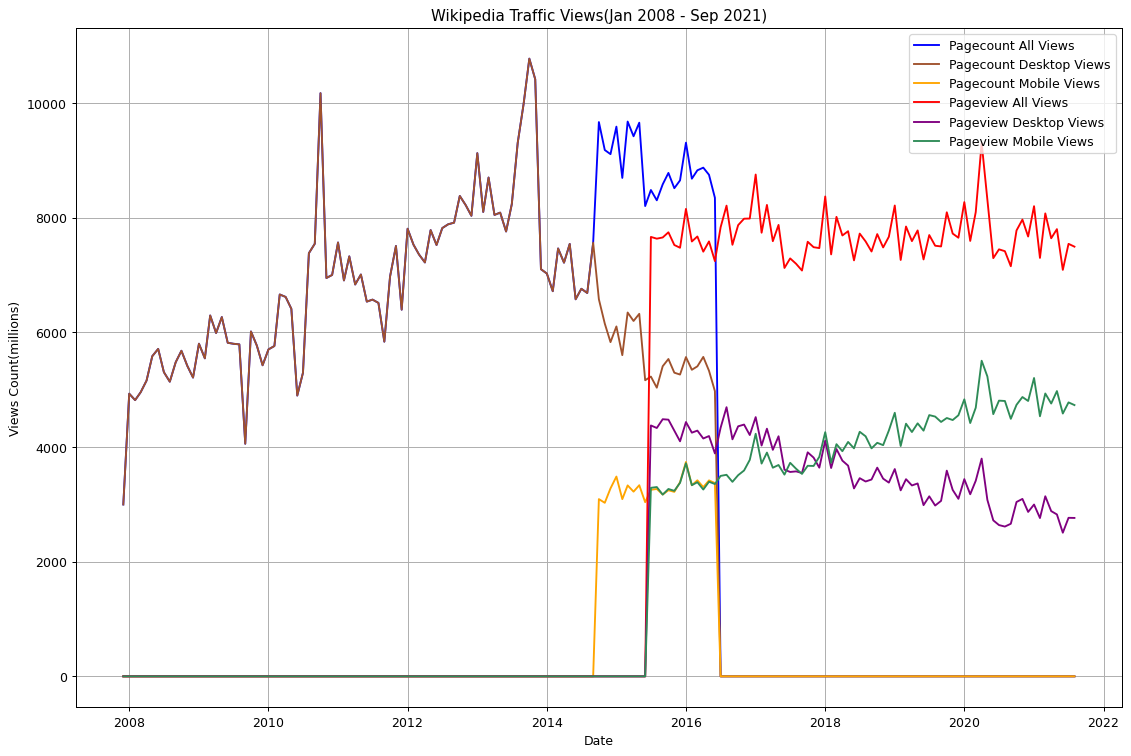

In [19]:
fig = plt.figure(figsize = (15,10),dpi=90)
plt.grid(True)

plt.plot(df_output["date"],df_output['pagecount_all_views']/1e6, color='blue', label='Pagecount All Views')
plt.plot(df_output["date"],df_output['pagecount_desktop_views']/1e6, color='sienna', label='Pagecount Desktop Views')
plt.plot(df_output["date"],df_output['pagecount_mobile_views']/1e6, color='orange', label='Pagecount Mobile Views')
plt.plot(df_output["date"],df_output['pageview_all_views']/1e6, color='red', label='Pageview All Views')
plt.plot(df_output["date"],df_output['pageview_desktop_views']/1e6, color='purple', label='Pageview Desktop Views')
plt.plot(df_output["date"],df_output['pageview_mobile_views']/1e6, color='seagreen', label='Pageview Mobile Views')


plt.xlabel('Date')
plt.ylabel('Views Count(millions)')
plt.title("Wikipedia Traffic Views(Jan 2008 - Sep 2021)")
plt.legend(loc=1)

# save to png
plt.savefig("/Users/dinsind/Desktop/wiki_traffic_views_2008_2021.png")


